Star type prediction
In this notebook , exploratory data analysis has been done on the star dataset and then star type has been predicted using Random Forest Classifier aswell as Catboost classifier.
The data for this notebook has been taken from https://www.kaggle.com/deepu1109/star-dataset

Before we get into the exploratory analyis , let's have a look at the type of stars based on different categories...

Spectral class
Spectral class of a star is the measure of amount of energy radiated by it . The series goes in decreasing order from "O" class (hottest) to "M" (coolest).
O > B > A > F > G > K > M There is a good way to remember it -> O Be A Fine Gal Kiss Me (just for fun (; )


Quick Question : Do you know what is the spectral class of our sun ?
Answer at the end of the notebook.
Size
Stars on the basis of their size have been classified into the following main categories :

Red Dwarf
White Dwarf
Brown Dwarf
Main Sequence
Supergiants
Hypergiants
All these categories have their special place in the Hertzsprung Russell diagram which compares temperature and luminoscity of these stars.

image.png

Other common parameters that will be used in this notebook are :

Absolute Temperature (in K)
Relative Luminosity (L/Lo)
Relative Radius (R/Ro)
Absolute Magnitude (Mv)
Star Color (white,Red,Blue,Yellow,yellow-orange etc)
Now let's start the preparation of our EDA on the given dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

/input/6 class csv.csv


# Exploratory data analisys 

In [2]:
data = pd.read_csv("../input/6 class csv.csv")
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
data.shape

(240, 7)

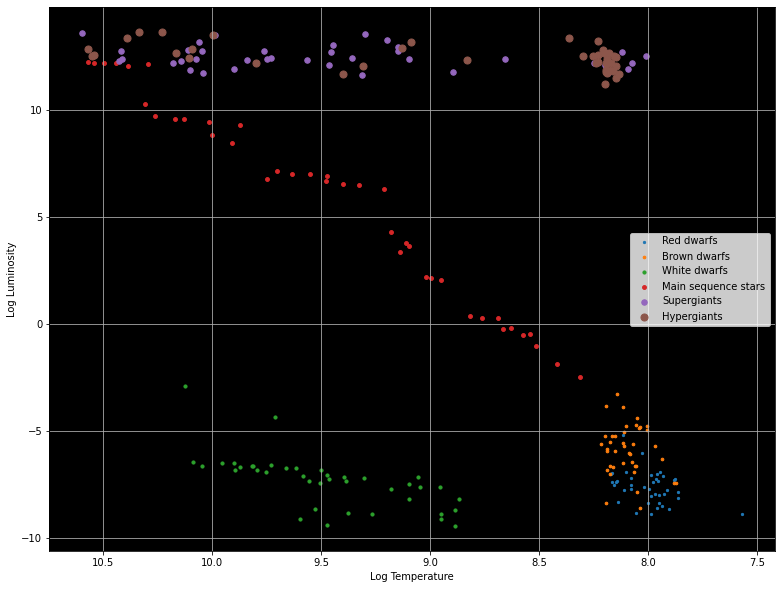

In [4]:
stars = pd.read_csv("../input/6 class csv.csv")

fig , ax = plt.subplots(figsize = (13,10))

R = stars[stars["Star type"] == 0]
B = stars[stars["Star type"] == 1]
W = stars[stars["Star type"] == 2]
M = stars[stars["Star type"] == 3]
S = stars[stars["Star type"] == 4]
H = stars[stars["Star type"] == 5]

ax.scatter(np.log(R["Temperature (K)"]), np.log(R["Luminosity(L/Lo)"]),5, label = 'Red dwarfs')
ax.scatter(np.log(B["Temperature (K)"]), np.log(B["Luminosity(L/Lo)"]),7, label = 'Brown dwarfs')
ax.scatter(np.log(W["Temperature (K)"]), np.log(W["Luminosity(L/Lo)"]),10, label = 'White dwarfs')
ax.scatter(np.log(M["Temperature (K)"]), np.log(M["Luminosity(L/Lo)"]),15, label = 'Main sequence stars')
ax.scatter(np.log(S["Temperature (K)"]), np.log(S["Luminosity(L/Lo)"]),30, label = 'Supergiants')
ax.scatter(np.log(H["Temperature (K)"]), np.log(H["Luminosity(L/Lo)"]),50, label = 'Hypergiants')

ax.invert_xaxis()
ax.legend()
plt.xlabel("Log Temperature")
plt.ylabel("Log Luminosity")
ax.grid()
ax.set_facecolor("black")

Have we got well-balanced data?


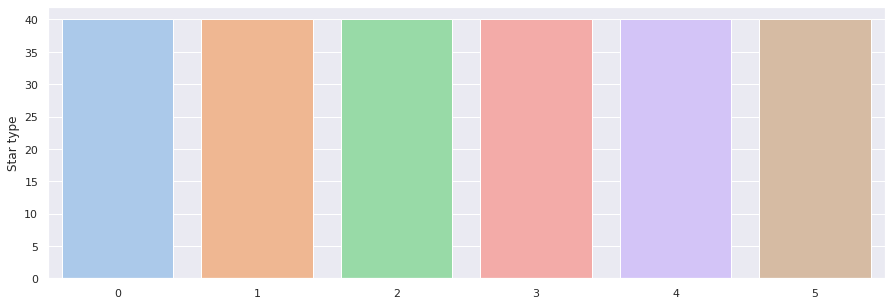

In [5]:
sns.set(style="darkgrid")
stars_types = pd.DataFrame(data['Star type'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = stars_types.index, y = 'Star type' , data = stars_types, palette='pastel')

Explore color types:

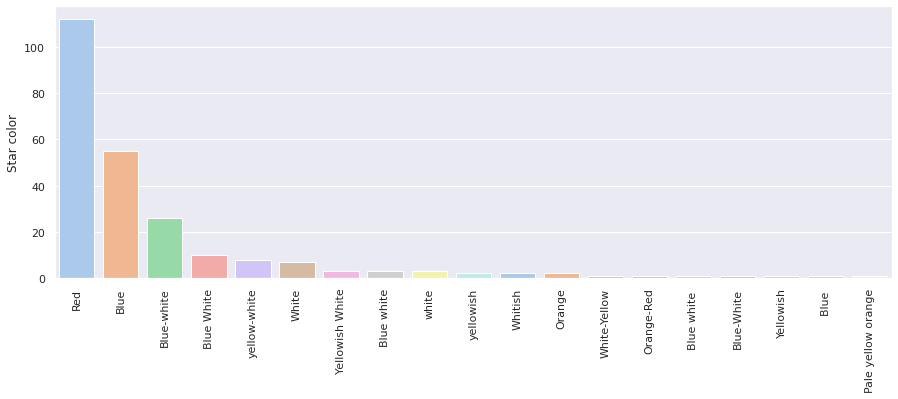

In [6]:
stars_color = pd.DataFrame(data['Star color'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(15,5))
ax = sns.barplot(x = stars_color.index, y = 'Star color' , data = stars_color, palette='pastel')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

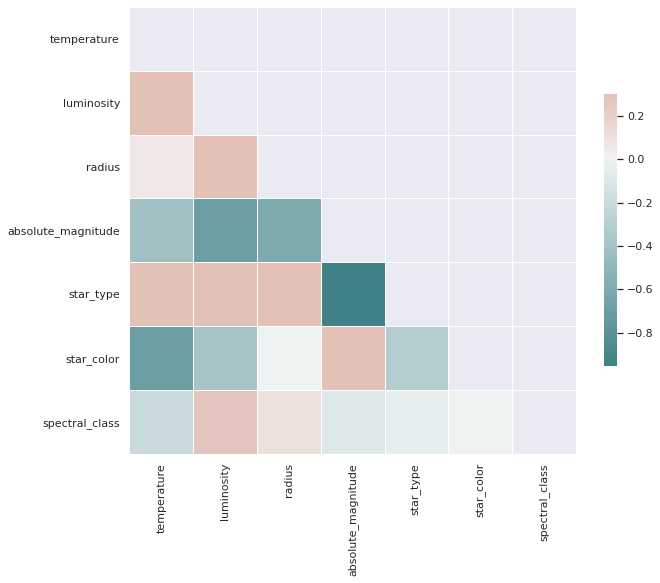

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
temperature,1.000000,0.393404,0.064216,-0.420261,0.411129,-0.697438,-0.207852
luminosity,0.393404,1.000000,0.526516,-0.692619,0.676845,-0.393509,0.275280
radius,0.064216,0.526516,1.000000,-0.608728,0.660975,-0.000818,0.097124
absolute_magnitude,-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.333552,-0.085840
star_type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.317103,-0.049131
star_color,-0.697438,-0.393509,-0.000818,0.333552,-0.317103,1.000000,-0.006298
spectral_class,-0.207852,0.275280,0.097124,-0.085840,-0.049131,-0.006298,1.000000


In [7]:
stars_data = {
    'temperature': data['Temperature (K)'],
    'luminosity': data['Luminosity(L/Lo)'],
    'radius': data['Radius(R/Ro)'],
    'absolute_magnitude': data['Absolute magnitude(Mv)'],
    'star_type': data['Star type'],
    'star_color': data['Star color'],
    'spectral_class': data['Spectral Class']
}
stars_data = pd.DataFrame.from_dict(stars_data)
stars_data['star_type'] = stars_data['star_type'].astype('category').cat.codes
stars_data['star_color'] = stars_data['star_color'].astype('category').cat.codes
stars_data['spectral_class'] = stars_data['spectral_class'].astype('category').cat.codes

corr = stars_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
corr

And we can see the most high dependenses between:

temp and radius;
star_type and star_color, spectral_class;
star_color and radius, spectral_class.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

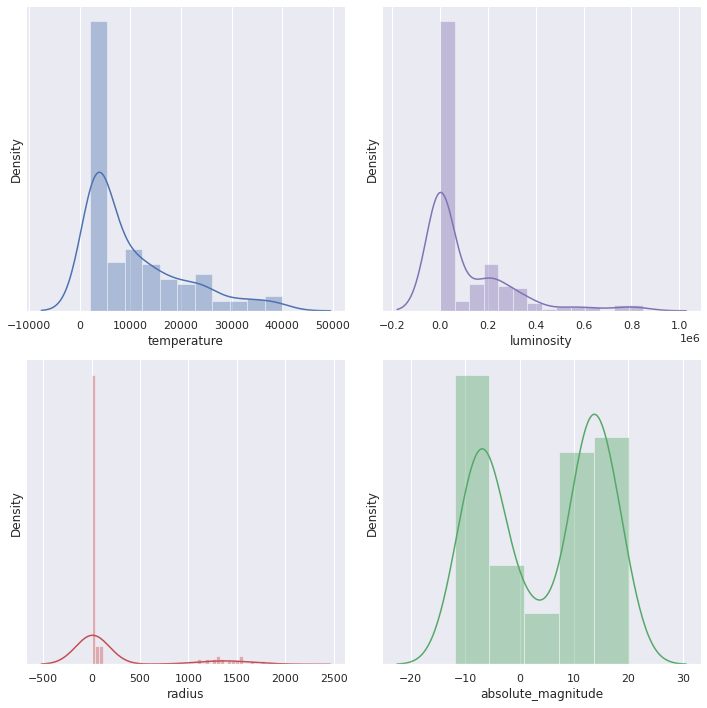

In [8]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.despine(left=True)

sns.distplot(stars_data['temperature'], color='b', ax=axes[0, 0])
sns.distplot(stars_data['luminosity'], color='m', ax=axes[0, 1])
sns.distplot(stars_data['radius'], color='r', ax=axes[1, 0])
sns.distplot(stars_data['absolute_magnitude'], color='g', ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

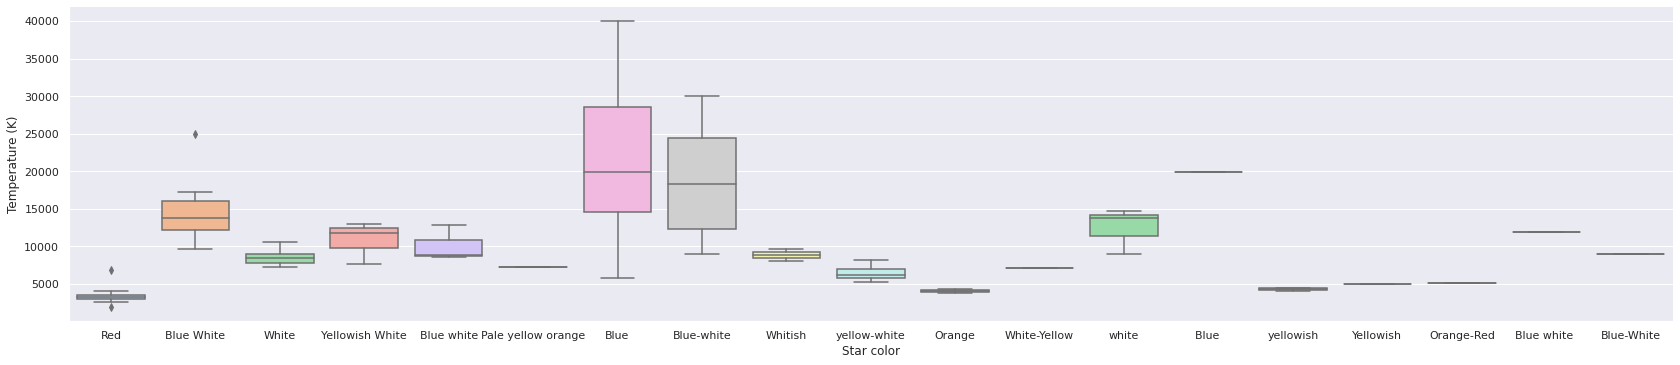

In [9]:
ax = sns.catplot(x = 'Star color', y = 'Temperature (K)', kind = "box", data = data, palette='pastel')
ax = ax.fig.set_size_inches(30, 5)

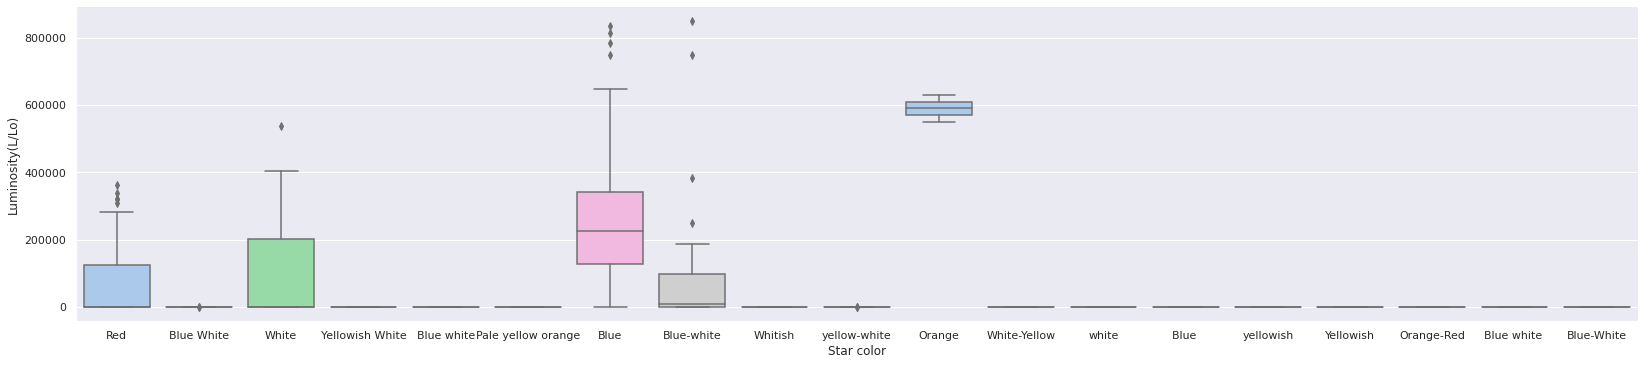

In [10]:
ax = sns.catplot(x = 'Star color', y = 'Luminosity(L/Lo)', kind = "box", data = data, palette='pastel')
ax = ax.fig.set_size_inches(30, 5)

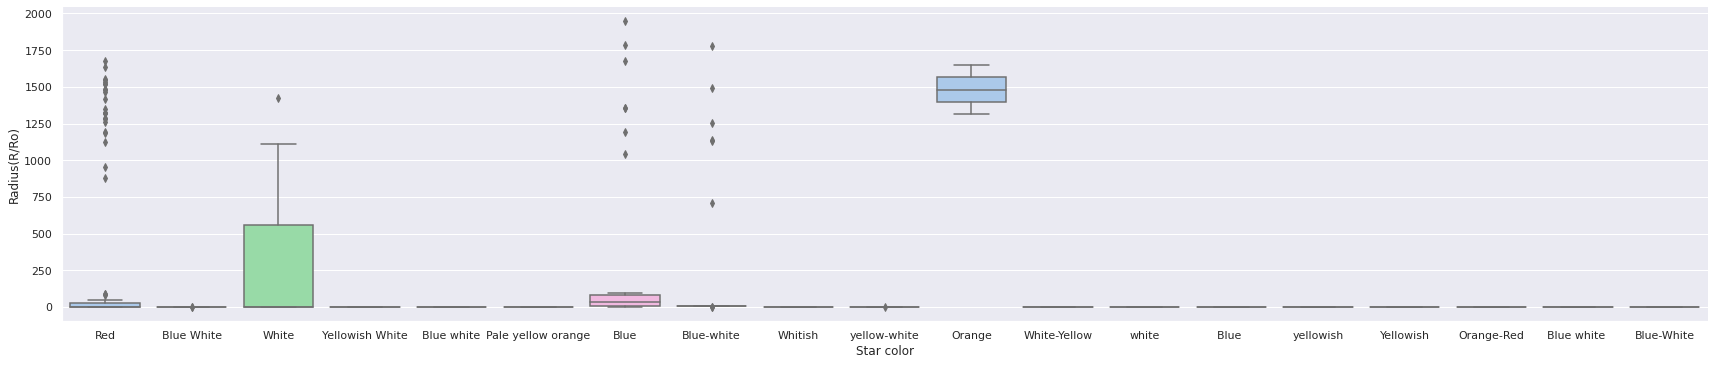

In [11]:
ax = sns.catplot(x = 'Star color', y = 'Radius(R/Ro)', kind = "box", data = data, palette='pastel')
ax = ax.fig.set_size_inches(30, 5)

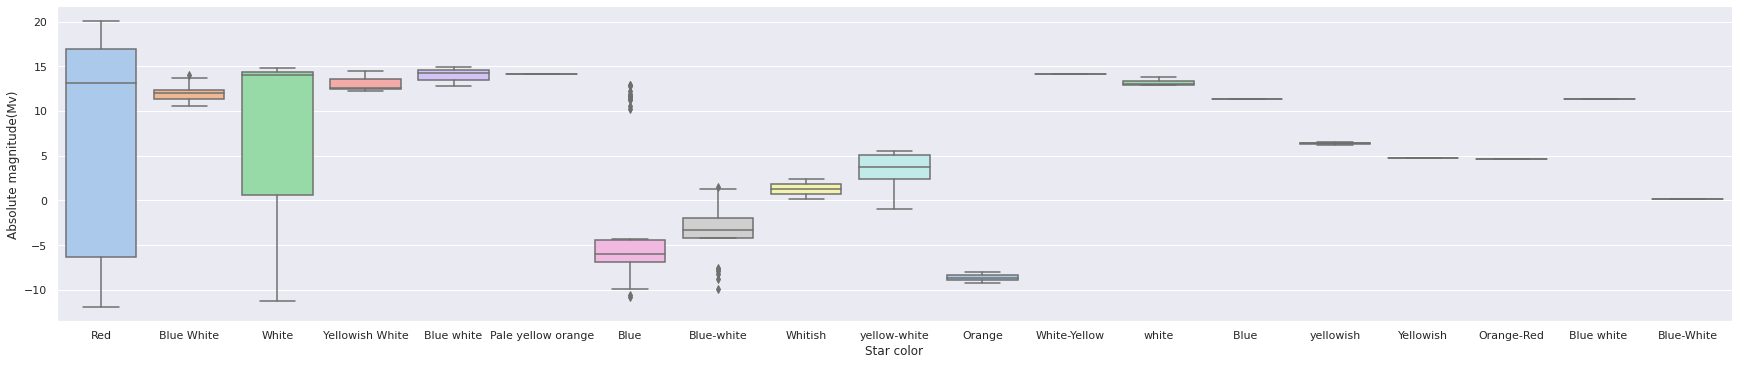

In [12]:
ax = sns.catplot(x = 'Star color', y = 'Absolute magnitude(Mv)', kind = "box", data = data, palette='pastel')
ax = ax.fig.set_size_inches(30, 5)

In [13]:
import plotly.express as px

fig = px.scatter(data, x="Temperature (K)", y="Luminosity(L/Lo)", size="Radius(R/Ro)", color="Star color",
           hover_name="Star type", log_x=True, size_max=60)
fig.show()

Explore spectral classes:

Here, we want to convert data like Star color and Spectral Class into numbers:

In [14]:
print(data['Star color'].unique())
print(data['Spectral Class'].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [15]:
data['Star color'] = data['Star color'].replace('Blue white', 'Blue White').replace('Blue-white', 'Blue White').replace('Blue white ', 'Blue White').replace('Blue-White', 'Blue White').replace('Blue ', 'Blue').replace('white', 'White').replace('Whitish', 'White').replace('Yellowish White', 'Yellow White').replace('yellow-white', 'Yellow White').replace('White-Yellow', 'Yellow White').replace('yellowish', 'Yellow').replace('Yellowish', 'Yellow').replace('Pale yellow orange', 'Yellow Orange').replace('Orange-Red', 'Orange Red')
# data["Star color"] = pd.factorize(data["Star color"])[0]
# data["Spectral Class"] = pd.factorize(data["Spectral Class"])[0]
le = preprocessing.LabelEncoder()
data['Spectral Class'] = le.fit_transform(list(data['Spectral Class']))
data['Star color'] = le.fit_transform(list(data['Star color']))
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,4,5
1,3042,0.000500,0.1542,16.60,0,4,5
2,2600,0.000300,0.1020,18.70,0,4,5
3,2800,0.000200,0.1600,16.65,0,4,5
4,1939,0.000138,0.1030,20.06,0,4,5


In [16]:
print(data['Star color'].unique())
print(data['Spectral Class'].unique())

[4 1 5 8 7 0 2 6 3]
[5 1 0 2 6 4 3]


At last, we made visualisation of different types of the data  in the dataset:

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



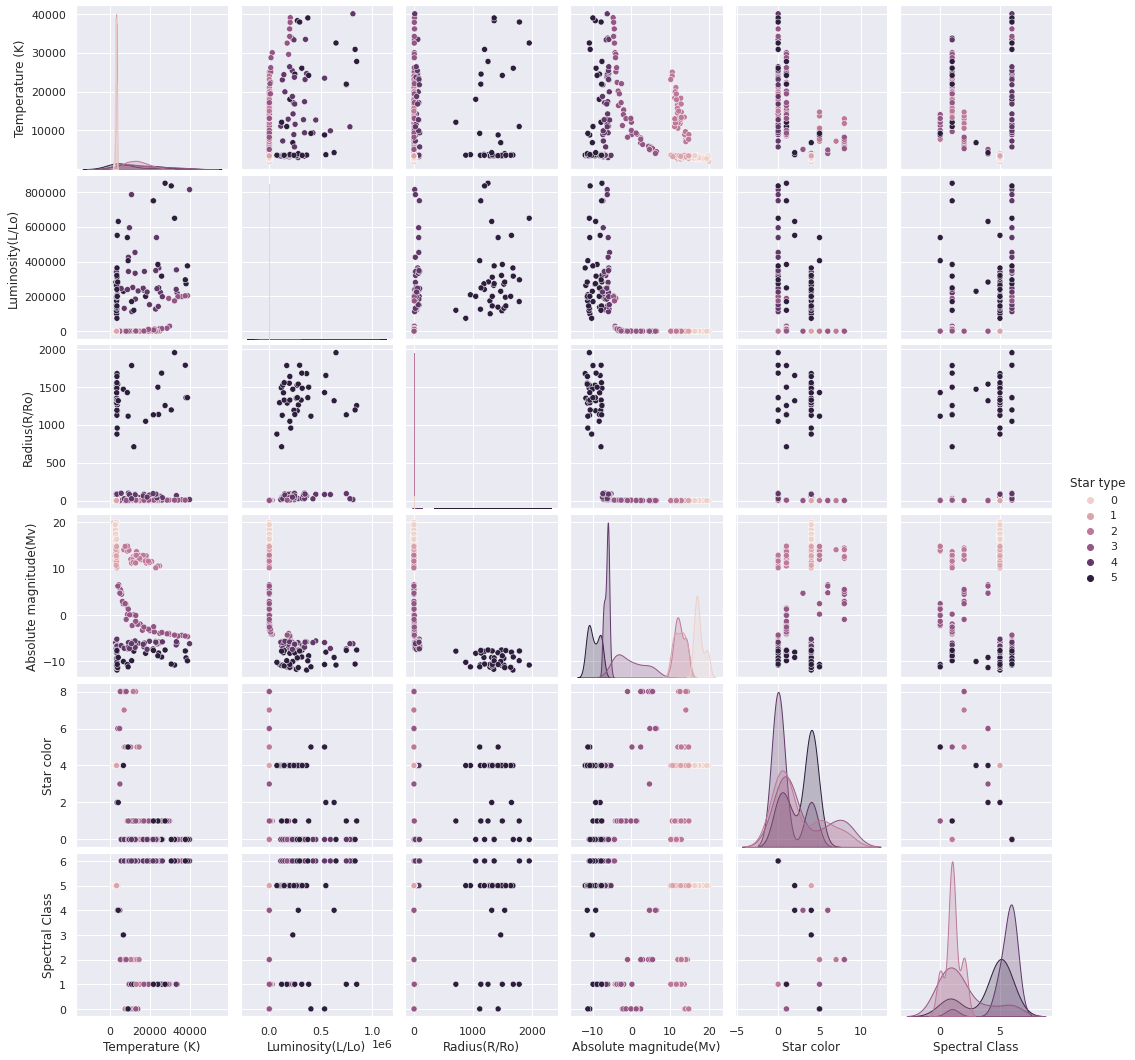

In [17]:
sns.pairplot(data, hue="Star type")

It is possible to see different aspects which a specific for stars, for example temperatures of a star could be less than 40 000 K.

Here is a correlation matrix:

In [18]:
corr_matrix = data.corr()
print(corr_matrix["Star type"])

Temperature (K)           0.411129
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Absolute magnitude(Mv)   -0.955276
Star type                 1.000000
Star color               -0.326076
Spectral Class           -0.049131
Name: Star type, dtype: float64


In [19]:
columns = ["Absolute magnitude(Mv)","Radius(R/Ro)", "Luminosity(L/Lo)", "Temperature (K)", "Spectral Class"]
X = data[columns].values
y = data["Star type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(192, 5)
(48, 5)
(192,)
(48,)


The data has been separated for future predictions.

# Prediction

### 1. Logistic Regression

In [20]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [21]:
y_lr = lr.predict(X_test)
print(accuracy_score(y_test,y_lr))

0.6041666666666666


###  2. Random forest

In [22]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
rfc_preds = rfc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, rfc_preds))

Accuracy: 1.0


### 3. SVC ( Support Vector Classifier ) 

In [24]:
svc = SVC(kernel='linear')

svc.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
svc_preds = svc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, svc_preds))

Accuracy: 1.0


### 4. K-Nearest Neighbour Classifier

In [26]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
knc_preds = knc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, knc_preds))

Accuracy: 0.6458333333333334


In [28]:
knc_preds

array([4, 0, 2, 2, 3, 0, 3, 2, 4, 4, 5, 1, 1, 3, 2, 4, 5, 0, 2, 5, 5, 5,
       5, 3, 4, 5, 0, 0, 3, 2, 3, 4, 2, 3, 5, 3, 3, 0, 4, 4, 0, 3, 5, 3,
       0, 2, 1, 2])

In [29]:
import numpy as np

from catboost import CatBoostClassifier, Pool

# initialize data
#train_data = np.random.randint(0,
#                               100, 
#                               size=(100, 10))

#train_labels = np.random.randint(0,
#                                 2,
#                                 size=(100))

#test_data = catboost_pool = Pool(train_data, 
#                                 train_labels)

model = CatBoostClassifier(iterations=100,
                           depth=3,
                           learning_rate=0.5,
                           loss_function='MultiClass',
                           verbose=True)
# train the model
model.fit(X_train,y_train)
# make the prediction using the resulting model
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
#print("class = ", preds_class)
#print("proba = ", preds_proba)

print("Accuracy:", metrics.accuracy_score(y_test, preds_class))


0:	learn: 0.9352556	total: 55.3ms	remaining: 5.48s
1:	learn: 0.6321638	total: 56.4ms	remaining: 2.76s
2:	learn: 0.5116514	total: 57.1ms	remaining: 1.85s
3:	learn: 0.3909278	total: 57.9ms	remaining: 1.39s
4:	learn: 0.3262111	total: 58.6ms	remaining: 1.11s
5:	learn: 0.2776022	total: 59.3ms	remaining: 929ms
6:	learn: 0.2310350	total: 60ms	remaining: 798ms
7:	learn: 0.2055261	total: 60.8ms	remaining: 699ms
8:	learn: 0.1749911	total: 61.5ms	remaining: 622ms
9:	learn: 0.1445782	total: 62.2ms	remaining: 560ms
10:	learn: 0.1280454	total: 63.1ms	remaining: 510ms
11:	learn: 0.1104409	total: 63.9ms	remaining: 469ms
12:	learn: 0.1046881	total: 64.6ms	remaining: 432ms
13:	learn: 0.0998561	total: 65.3ms	remaining: 401ms
14:	learn: 0.0952003	total: 66.1ms	remaining: 374ms
15:	learn: 0.0927723	total: 66.8ms	remaining: 351ms
16:	learn: 0.0817484	total: 67.5ms	remaining: 330ms
17:	learn: 0.0718931	total: 68.2ms	remaining: 311ms
18:	learn: 0.0658128	total: 69ms	remaining: 294ms
19:	learn: 0.0637075	total

In [30]:
preds_class

array([[4],
       [1],
       [2],
       [3],
       [3],
       [0],
       [3],
       [2],
       [5],
       [5],
       [5],
       [0],
       [1],
       [3],
       [2],
       [3],
       [5],
       [0],
       [3],
       [4],
       [5],
       [5],
       [4],
       [3],
       [5],
       [5],
       [0],
       [0],
       [3],
       [2],
       [2],
       [4],
       [2],
       [2],
       [4],
       [3],
       [3],
       [1],
       [4],
       [5],
       [1],
       [3],
       [5],
       [3],
       [0],
       [3],
       [1],
       [2]])